In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

In [5]:
# 1. INITIAL DATA EXPLORATION
print("="*80)
print("INITIAL DATA EXPLORATION")
print("="*80)
print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nDataset Info:")
print(df.info())

INITIAL DATA EXPLORATION

Dataset Shape:
Rows: 55551, Columns: 31

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.00

In [6]:
# 2. DATA QUALITY ASSESSMENT
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Missing Values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

print("\nDuplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

print("\nBasic Statistical Summary:")
print(df.describe())

print("\nClass Distribution:")
print(df['Class'].value_counts())
print("\nClass Distribution (%):")
print(df['Class'].value_counts(normalize=True) * 100)


DATA QUALITY ASSESSMENT

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Total Missing Values: 16
Percentage of Missing Values: 0.00%

Duplicate Rows:
Number of Duplicate Rows: 237

Basic Statistical Summary:
               Time            V1            V2            V3            V4  \
count  55551.000000  55551.000000  55551.000000  55551.000000  55551.000000   
mean   30593.297438     -0.242712     -0.003647      0.691422      0.176704   
std    13417.206531      1.874492      1.646638      1.469689      1.390191   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    24650.000000     -0.995659     -0.

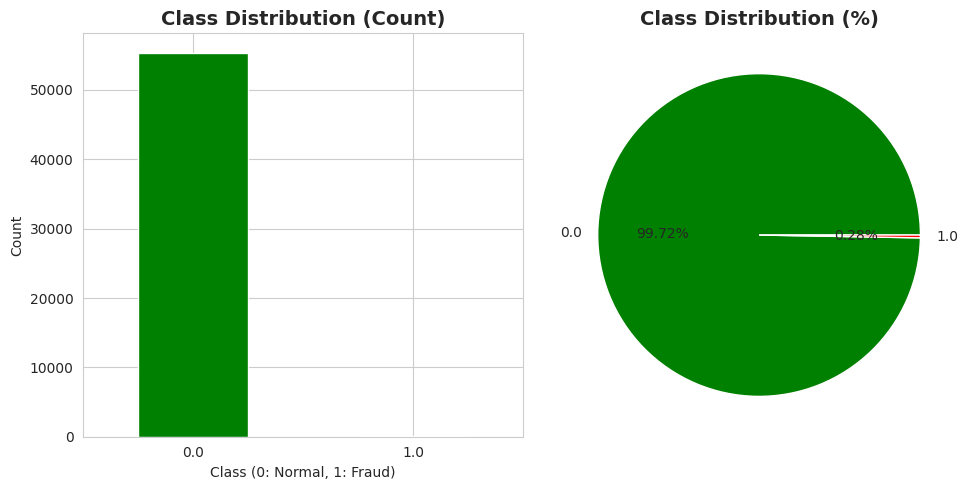

In [7]:
# 3. VISUALIZATIONS - Class Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Class'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['green', 'red'])
plt.title('Class Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()


FEATURE ANALYSIS

Time Feature Statistics:
count    55551.000000
mean     30593.297438
std      13417.206531
min          0.000000
25%      24650.000000
50%      34700.000000
75%      40776.000000
max      47005.000000
Name: Time, dtype: float64

Amount Feature Statistics:
count    55550.000000
mean        94.706159
std        256.951934
min          0.000000
25%          7.680000
50%         25.765000
75%         87.000000
max      12910.930000
Name: Amount, dtype: float64


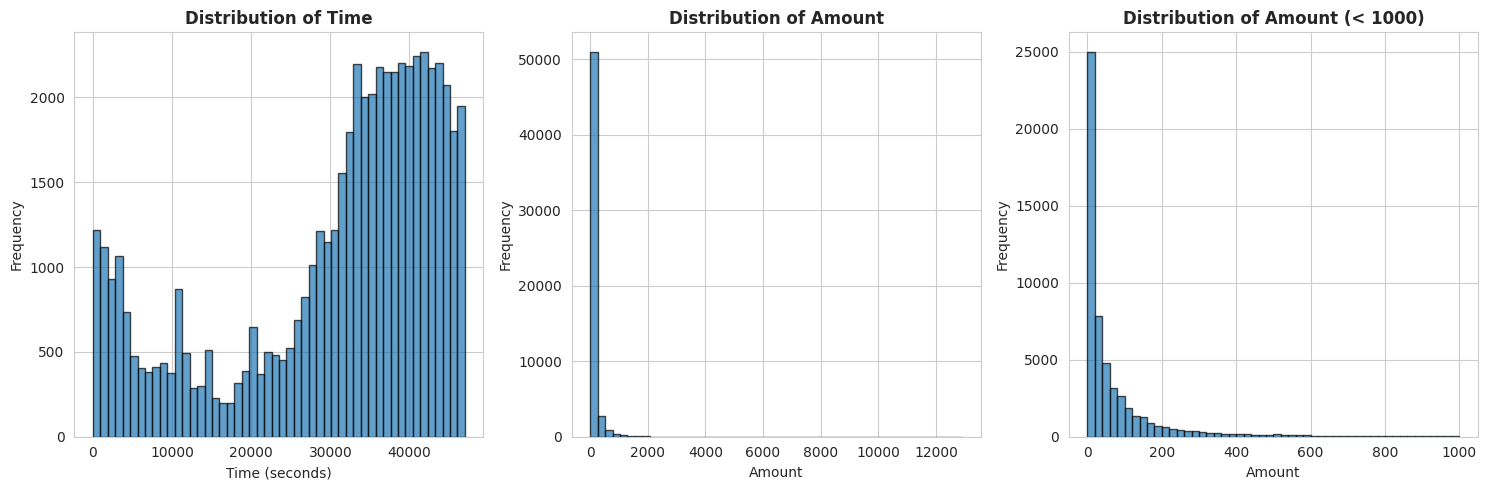

In [8]:
# 4. FEATURE ANALYSIS - Time and Amount
print("\n" + "="*80)
print("FEATURE ANALYSIS")
print("="*80)

print("\nTime Feature Statistics:")
print(df['Time'].describe())

print("\nAmount Feature Statistics:")
print(df['Amount'].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Time'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Time', fontsize=12, fontweight='bold')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Amount', fontsize=12, fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df[df['Amount'] < 1000]['Amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Amount (< 1000)', fontsize=12, fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



FRAUD VS NORMAL TRANSACTION ANALYSIS

Amount Statistics by Class:
         count       mean         std  min   25%    50%      75%       max
Class                                                                     
0.0    55394.0  94.703197  257.030241  0.0  7.68  25.79  86.9075  12910.93
1.0      156.0  95.758013  228.178528  0.0  1.00   4.93  99.9900   1809.68


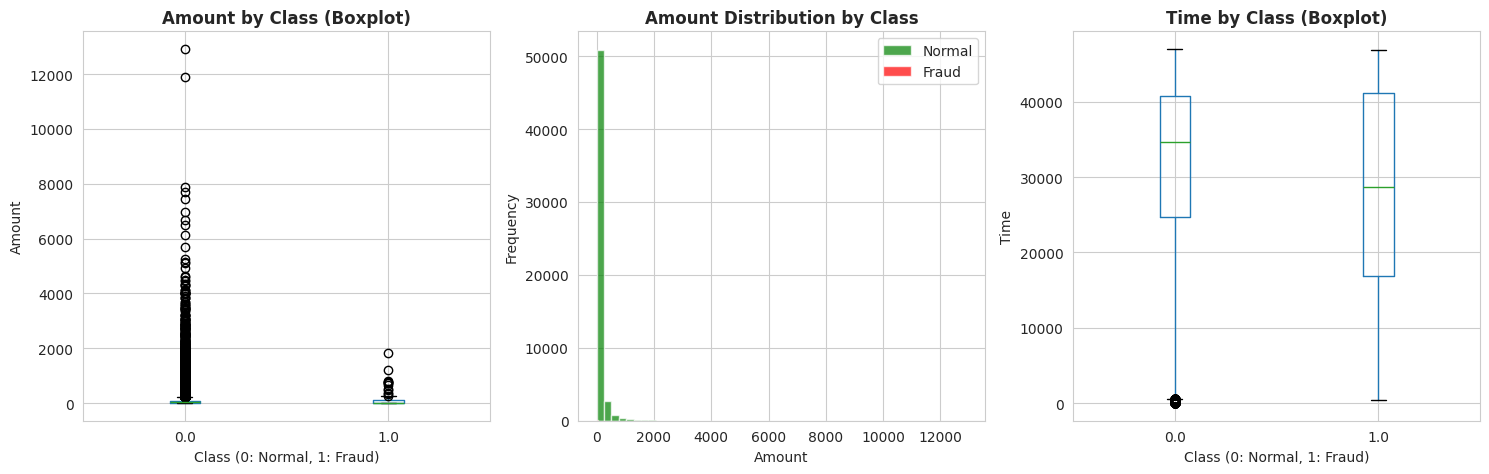

In [9]:
# 5. FRAUD VS NORMAL TRANSACTION ANALYSIS
print("\n" + "="*80)
print("FRAUD VS NORMAL TRANSACTION ANALYSIS")
print("="*80)

print("\nAmount Statistics by Class:")
print(df.groupby('Class')['Amount'].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.boxplot(column='Amount', by='Class', ax=plt.gca())
plt.title('Amount by Class (Boxplot)', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Amount')

plt.subplot(1, 3, 2)
df[df['Class'] == 0]['Amount'].hist(bins=50, alpha=0.7, label='Normal', color='green')
df[df['Class'] == 1]['Amount'].hist(bins=50, alpha=0.7, label='Fraud', color='red')
plt.title('Amount Distribution by Class', fontsize=12, fontweight='bold')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
df.boxplot(column='Time', by='Class', ax=plt.gca())
plt.title('Time by Class (Boxplot)', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

In [10]:
# 6. CORRELATION ANALYSIS
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)


CORRELATION ANALYSIS


In [11]:
# Correlation with target variable
correlations = df.corr()['Class'].sort_values(ascending=False)
print("\nTop 10 Features Positively Correlated with Fraud:")
print(correlations.head(10))
print("\nTop 10 Features Negatively Correlated with Fraud:")
print(correlations.tail(10))


Top 10 Features Positively Correlated with Fraud:
Class    1.000000
V11      0.235310
V4       0.211208
V2       0.169504
V8       0.154763
V27      0.079350
V21      0.066501
V19      0.059872
V20      0.029116
V25      0.012701
Name: Class, dtype: float64

Top 10 Features Negatively Correlated with Fraud:
V5    -0.195028
V1    -0.201084
V18   -0.209785
V7    -0.319935
V16   -0.320233
V12   -0.330923
V10   -0.342654
V3    -0.383253
V14   -0.426194
V17   -0.477771
Name: Class, dtype: float64


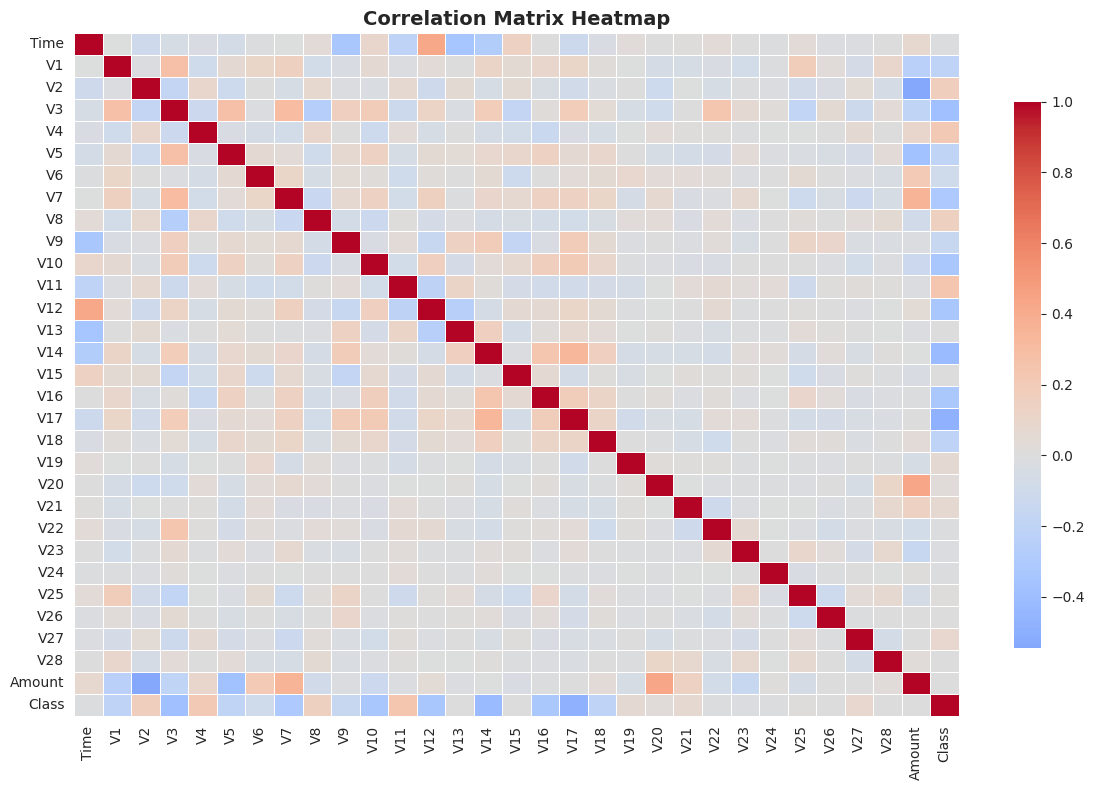

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

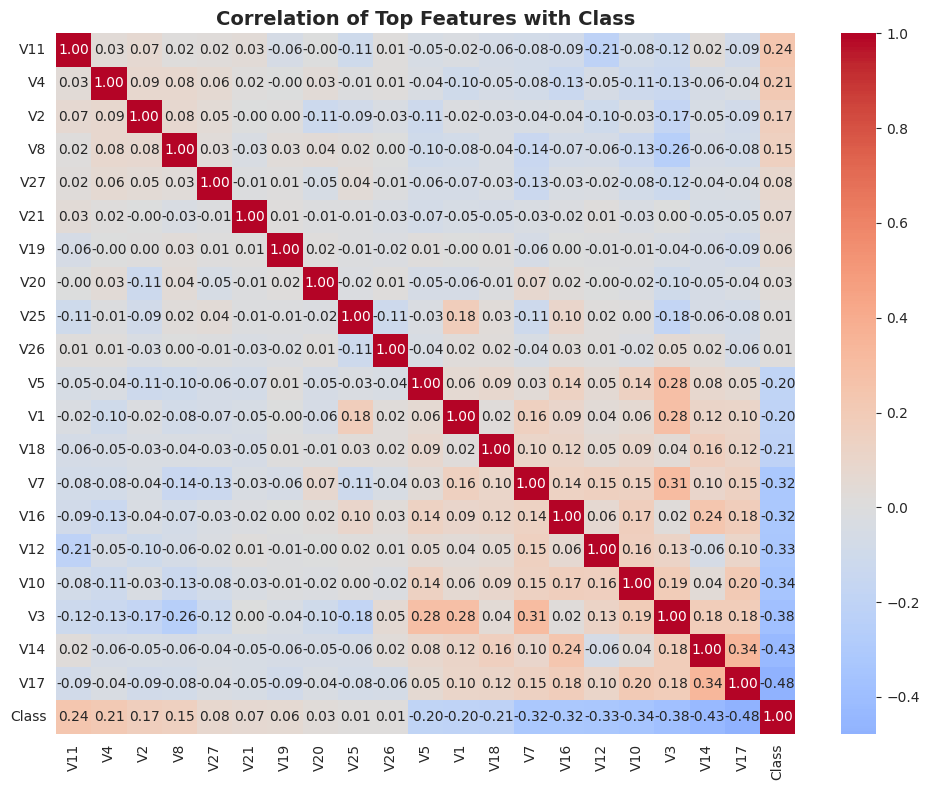

In [13]:
# Correlation of top features with Class
top_features = correlations[1:11].index.tolist() + correlations[-10:].index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['Class']].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation of Top Features with Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
# 7. FEATURE DISTRIBUTION ANALYSIS
print("\n" + "="*80)
print("V FEATURES DISTRIBUTION ANALYSIS")
print("="*80)

v_features = [col for col in df.columns if col.startswith('V')]
print(f"\nNumber of V features: {len(v_features)}")


V FEATURES DISTRIBUTION ANALYSIS

Number of V features: 28


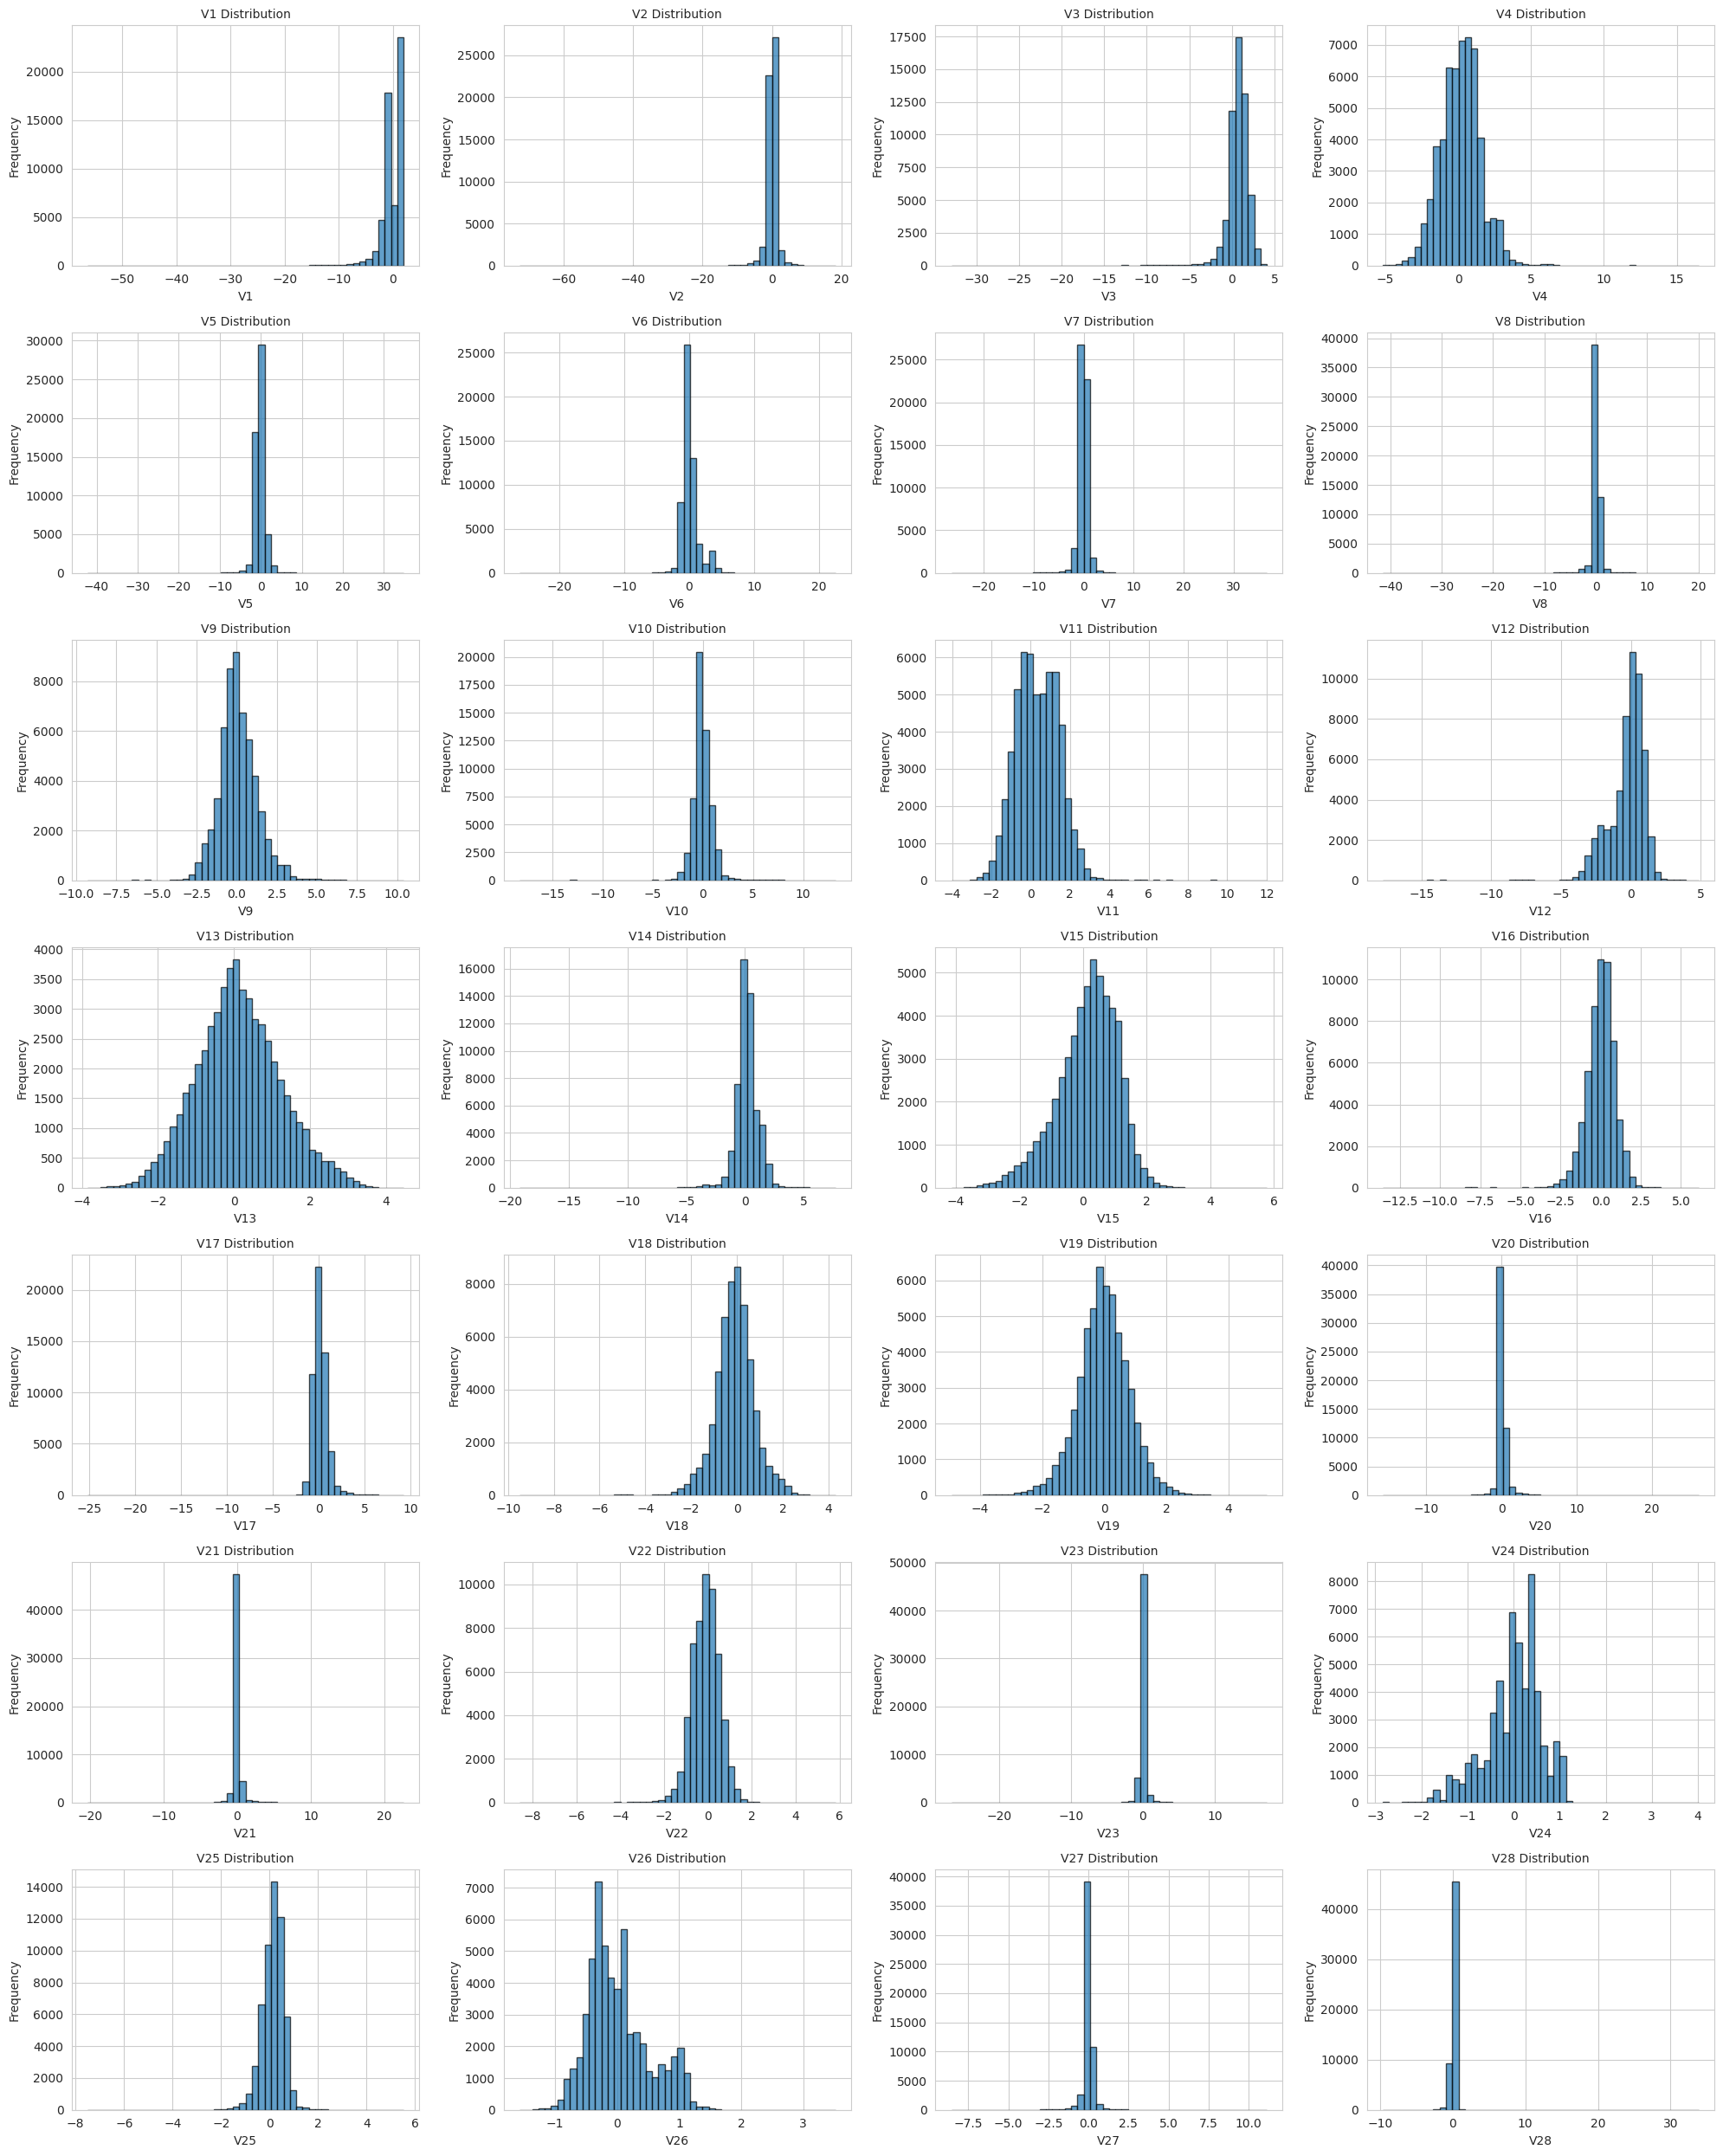

In [15]:
# Plot distribution of V features
fig, axes = plt.subplots(7, 4, figsize=(20, 25))
axes = axes.ravel()

for idx, col in enumerate(v_features):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=10)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [16]:
# 8. OUTLIER DETECTION
print("\n" + "="*80)
print("OUTLIER DETECTION")
print("="*80)

print("\nAmount Outliers (using IQR method):")
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")



OUTLIER DETECTION

Amount Outliers (using IQR method):
Number of outliers: 5828
Percentage of outliers: 10.49%


In [17]:
# 9. DATA PREPROCESSING STEPS
print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()

# Standardize Amount and Time
scaler = StandardScaler()
df_processed['Amount_scaled'] = scaler.fit_transform(df_processed[['Amount']])
df_processed['Time_scaled'] = scaler.fit_transform(df_processed[['Time']])

print("\nScaled Features Added:")
print("- Amount_scaled")
print("- Time_scaled")

print("\nAmount_scaled Statistics:")
print(df_processed['Amount_scaled'].describe())


DATA PREPROCESSING

Scaled Features Added:
- Amount_scaled
- Time_scaled

Amount_scaled Statistics:
count    5.555000e+04
mean     4.093135e-18
std      1.000009e+00
min     -3.685787e-01
25%     -3.386896e-01
50%     -2.683061e-01
75%     -2.999093e-02
max      4.987835e+01
Name: Amount_scaled, dtype: float64



FEATURE ENGINEERING

New Features Created:
- Hour: Hour of the day
- Day: Day number

Hour Distribution:
count    55551.000000
mean         8.498138
std          3.727002
min          0.000000
25%          6.847222
50%          9.638889
75%         11.326667
max         13.056944
Name: Hour, dtype: float64


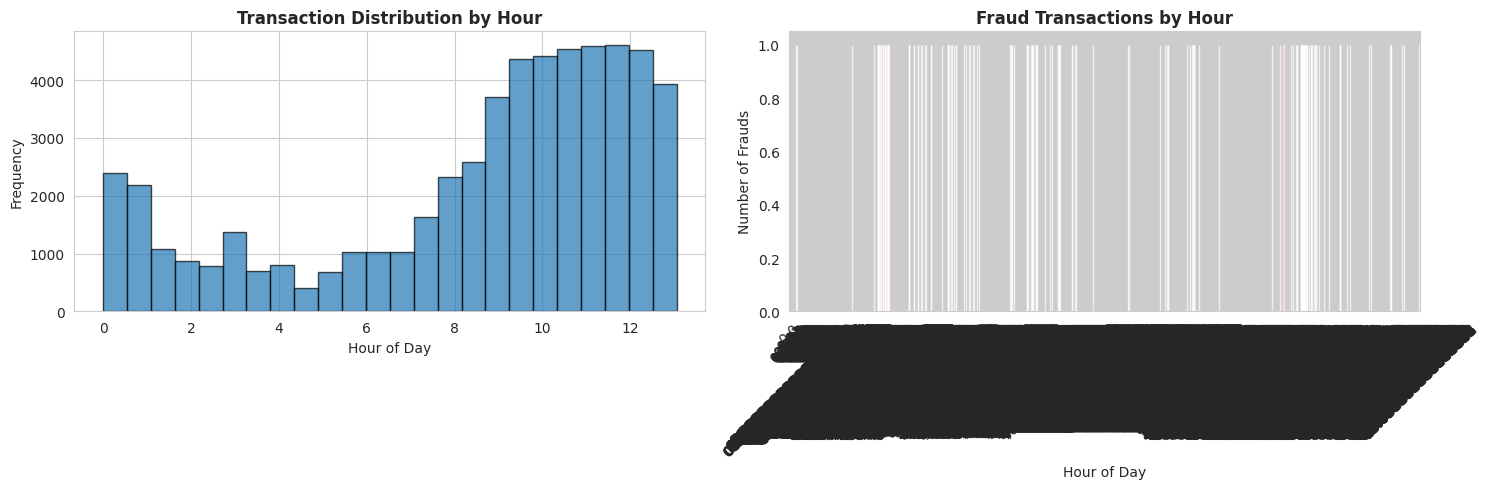

In [18]:
# 10. FEATURE ENGINEERING
print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

# Create time-based features
df_processed['Hour'] = (df_processed['Time'] / 3600) % 24
df_processed['Day'] = (df_processed['Time'] / 86400).astype(int)

print("\nNew Features Created:")
print("- Hour: Hour of the day")
print("- Day: Day number")

print("\nHour Distribution:")
print(df_processed['Hour'].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df_processed['Hour'].hist(bins=24, edgecolor='black', alpha=0.7)
plt.title('Transaction Distribution by Hour', fontsize=12, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
hour_fraud = df_processed.groupby('Hour')['Class'].sum()
hour_fraud.plot(kind='bar', color='red', alpha=0.7)
plt.title('Fraud Transactions by Hour', fontsize=12, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Frauds')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [19]:
# 11. FINAL DATASET SUMMARY
print("\n" + "="*80)
print("FINAL DATASET SUMMARY")
print("="*80)

print(f"\nProcessed Dataset Shape: {df_processed.shape}")
print(f"\nNew Columns Added: {set(df_processed.columns) - set(df.columns)}")

print("\nFinal Dataset Columns:")
print(df_processed.columns.tolist())

print("\nSample of Processed Data:")
print(df_processed.head())

# Save processed dataset
df_processed.to_csv('/content/creditcard_processed.csv', index=False)
print("\nProcessed dataset saved as: creditcard_processed.csv")


FINAL DATASET SUMMARY

Processed Dataset Shape: (55551, 35)

New Columns Added: {'Time_scaled', 'Hour', 'Amount_scaled', 'Day'}

Final Dataset Columns:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'Amount_scaled', 'Time_scaled', 'Hour', 'Day']

Sample of Processed Data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V25       V26       V27       V28  Amo

In [20]:
# 12. KEY INSIGHTS SUMMARY
print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print(f"""
1. Dataset Size: {df.shape[0]:,} transactions with {df.shape[1]} features
2. Class Imbalance: {(df['Class'].value_counts()[0]/len(df)*100):.2f}% Normal, {(df['Class'].value_counts()[1]/len(df)*100):.2f}% Fraud
3. Missing Values: {df.isnull().sum().sum()} (Clean dataset)
4. Duplicate Rows: {duplicates}
5. Amount Range: ${df['Amount'].min():.2f} to ${df['Amount'].max():.2f}
6. Time Range: {df['Time'].min():.0f} to {df['Time'].max():.0f} seconds ({df['Time'].max()/3600:.1f} hours)
7. Features: 28 PCA-transformed features (V1-V28) + Time + Amount + Class
8. Processed Features Added: Amount_scaled, Time_scaled, Hour, Day
""")

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS COMPLETE")
print("="*80)


KEY INSIGHTS SUMMARY

1. Dataset Size: 55,551 transactions with 31 features
2. Class Imbalance: 99.72% Normal, 0.28% Fraud
3. Missing Values: 16 (Clean dataset)
4. Duplicate Rows: 237
5. Amount Range: $0.00 to $12910.93
6. Time Range: 0 to 47005 seconds (13.1 hours)
7. Features: 28 PCA-transformed features (V1-V28) + Time + Amount + Class
8. Processed Features Added: Amount_scaled, Time_scaled, Hour, Day


EXPLORATORY DATA ANALYSIS COMPLETE
